## 生成原始数据，进行 FFT 变换

200
[ 1.44328993e-14+0.00000000e+00j -5.58638959e-15+5.00868856e-15j
 -2.03444067e-15-5.82736781e-15j -1.24311230e-15-7.62244274e-16j
  2.00000000e+02+1.07891726e-14j]


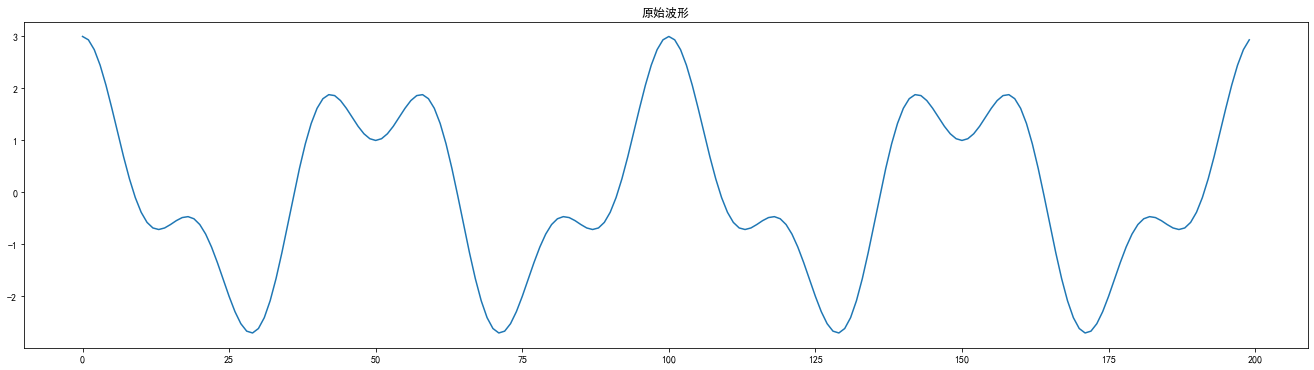

In [70]:
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
import numpy as np
import math

# %matplotlib qt5
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus'] = False       #显示负号

num = 200

# x = np.linspace(0, 1, num)      
x = np.arange(0, num)
 
# 生成两种周期的正弦叠加，T表示一个周期所需要的个数
T = 20
T2 = 50
def get_sin(x, T):
    return np.sin((x % T) * (2 * np.pi / T) + np.pi / 2)
y = get_sin(x, T)
y += get_sin(x, T2) * 2

def show_origin(x, y):
    plt.figure(figsize=(23, 6))
    plt.plot(x, y)   
    plt.title('原始波形')

show_origin(x, y)

# 正向 FFT 计算
fft_y = fft(y[:num])
print(len(fft_y))
print(fft_y[0:5])
# print(fft_y)


## 绘制单边振幅图，选取主要频率

注：频率的数字代表原始序列中包含多少个完整周期，如 f = 3 表示原始序列中包含 3 个完整的正弦信号

假设原始序列长度为 n，则 T = n / f

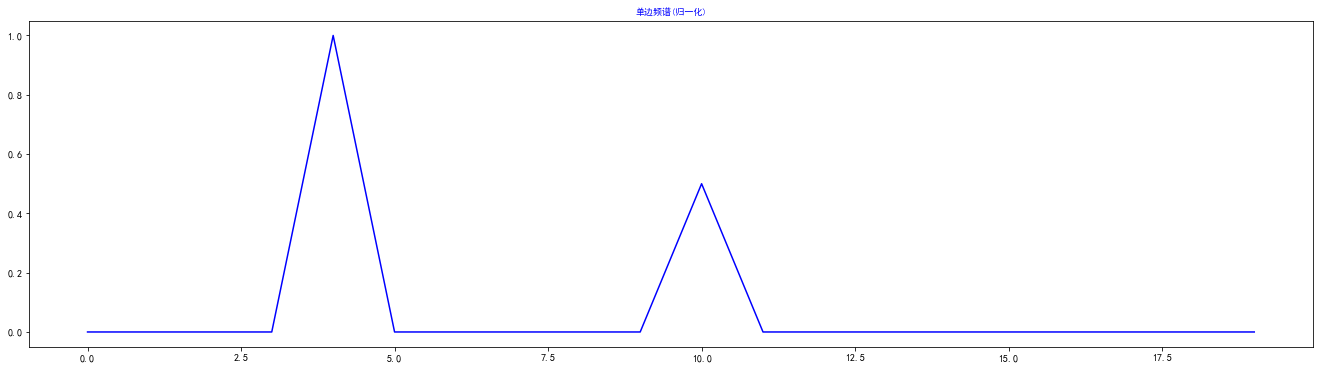

In [71]:
# 未归一化的双边振幅谱与相位谱
def show_fft_origin(fft_y):
    N = len(fft_y)
    x = np.arange(N)           # 频率个数
    
    abs_y = np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
    angle_y = np.angle(fft_y)              #取复数的角度
    
    plt.figure(figsize=(23, 6))
    plt.plot(x,abs_y)
    plt.title('双边振幅谱（未归一化）')
    
    plt.figure(figsize=(23, 6))
    plt.plot(x,angle_y)   
    plt.title('双边相位谱（未归一化）')
    plt.show()

# show_fft_origin(fft_y)

# 归一化的单边振幅谱
def show_fft_norm(fft_y, start, end=None):
    N = len(fft_y)
    x = np.arange(N)           # 频率个数
    abs_y = np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
    normalization_y = abs_y / N            #归一化处理（双边频谱）
    # plt.figure(figsize=(23, 6))
    # plt.plot(x[1:], normalization_y[1:],'g')
    # plt.title('双边频谱(归一化)', fontsize=9, color='green')
    # plt.show()

    half_x = x[range(int(N/2))]                                  #取一半区间
    # half_x = N / half_x
    normalization_half_y = normalization_y[range(int(N/2))]      #由于对称性，只取一半区间（单边频谱）
    plt.figure(figsize=(23, 6))
    plt.plot(half_x[start:end], normalization_half_y[start:end],'b')
    plt.title('单边频谱(归一化)', fontsize=9, color='blue')
    plt.show()

show_fft_norm(fft_y, 0, 20)

## 根据指定频率进行逆变换

196 (200-1.0789172563109347e-14j)
190 (100+2.3152663628119216e-14j)


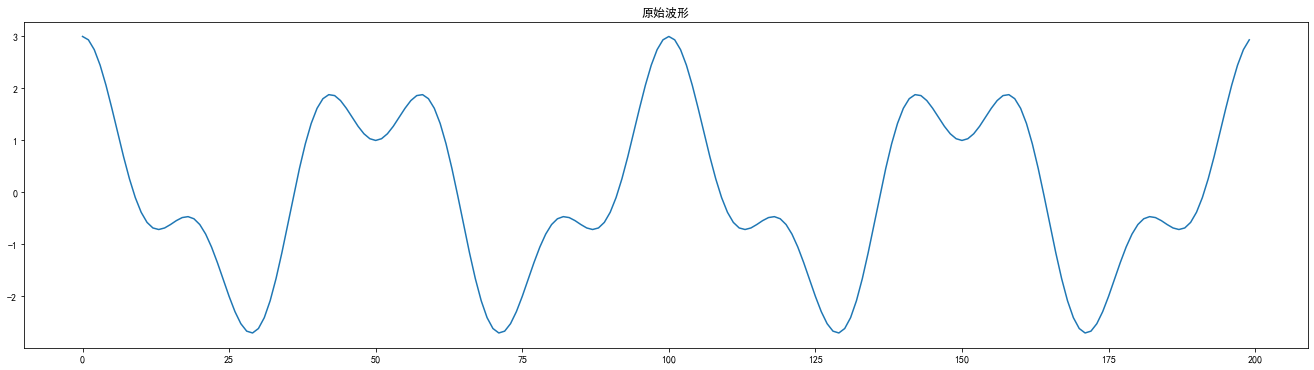

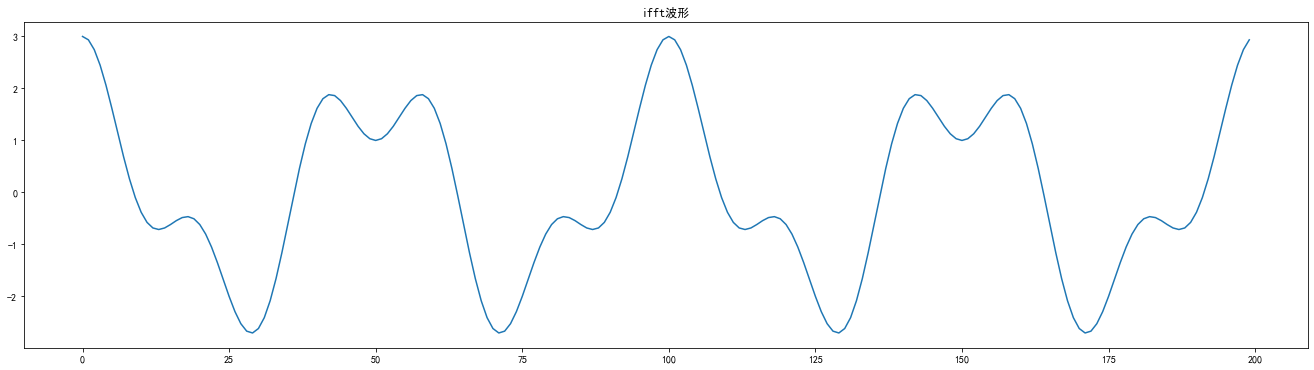

In [72]:
# 根据 fft 和 指定频率 还原出原始图像
def show_target_freq(x, fft_y2, target_freq):
    # Select target frequency
    N = len(fft_y2)
    largest_freq = 0
    smallest_freq = N // 2  # Included

    fft_y3 = np.zeros(N, dtype=complex)

    for freq in target_freq:
        assert freq <= smallest_freq
        fft_y3[freq] = fft_y2[freq]
        # print(freq, fft_y3[freq])
        if freq == 0:
            continue

        idx = N - freq
        fft_y3[idx] = fft_y2[idx]    # 1 -> N-1
        print(idx, fft_y3[idx])

    ifft_y = ifft(fft_y3)
    # ifft_y[:10]
    plt.figure(figsize=(23, 6))
    plt.plot(x[:len(ifft_y)], ifft_y)
    plt.title('ifft波形')

N = len(fft_y)
# target_freq = range(100)   # [largest_freq,  smallest_freq]
target_freq = [4, 10]
show_origin(x[:len(fft_y)], y[:len(fft_y)])
show_target_freq(x, fft_y, target_freq)